In [36]:
# Import packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Adjust default matplotlib settings
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.family'] = 'sans-serif'

In [38]:
# Read csv
df_avg_salaries = pd.read_csv('./data/1_avg_salary_per_role.csv')

In [39]:
# Create new column to display salary in 1000s
df_avg_salaries['avg_yearly_salary_1000'] = df_avg_salaries['avg_yearly_salary'] / 1000

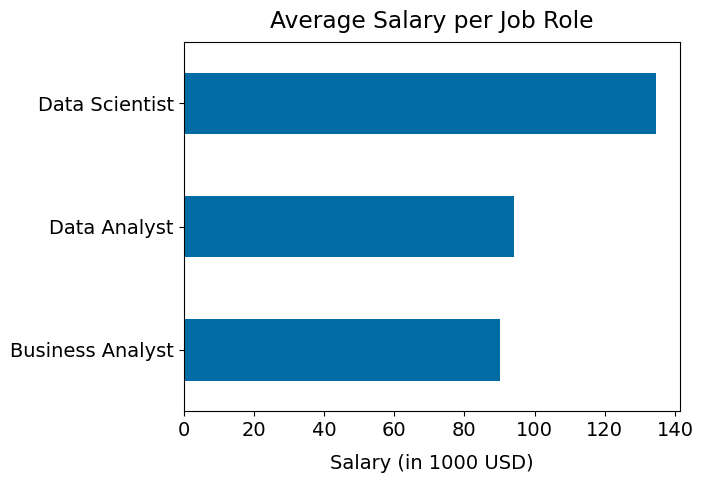

In [40]:
df_avg_salaries.plot(x='job_title_short', y='avg_yearly_salary_1000', kind='barh',
                     xlabel='Salary (in 1000 USD)', ylabel='', legend='',
                     title='Average Salary per Job Role');